# Credit Card Fraud EDA

This kernel is aimed at getting an understanding of the data set and it's distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First let's get an overview of the data.

In [2]:
df = pd.read_csv("Data/creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


 From the [data description](https://www.kaggle.com/mlg-ulb/creditcardfraud) we know that:
 - the data set consists of transactions occuring withing two days
 - time gives the elapsed seconds
 - amount the notes the transaction Amount
 - Class indicates whether a transaction is fraudulent
 - the V features where obtained by PCA from more privacy sensitive features

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- We have no missing data and no obvious outliers. 
- All features are numerical.
- The fraudulent transactions make up 0.173% of the total data set --> the data is highly imbalanced (as expected)

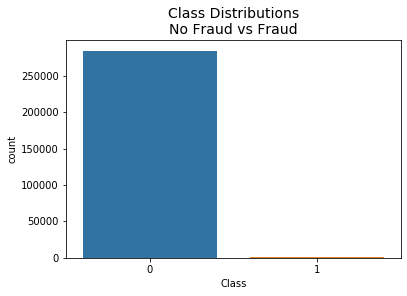

In [4]:
sns.countplot('Class', data=df)
plt.title('Class Distributions\nNo Fraud vs Fraud', fontsize=14)
plt.show()

Let's take a look at feature correlations

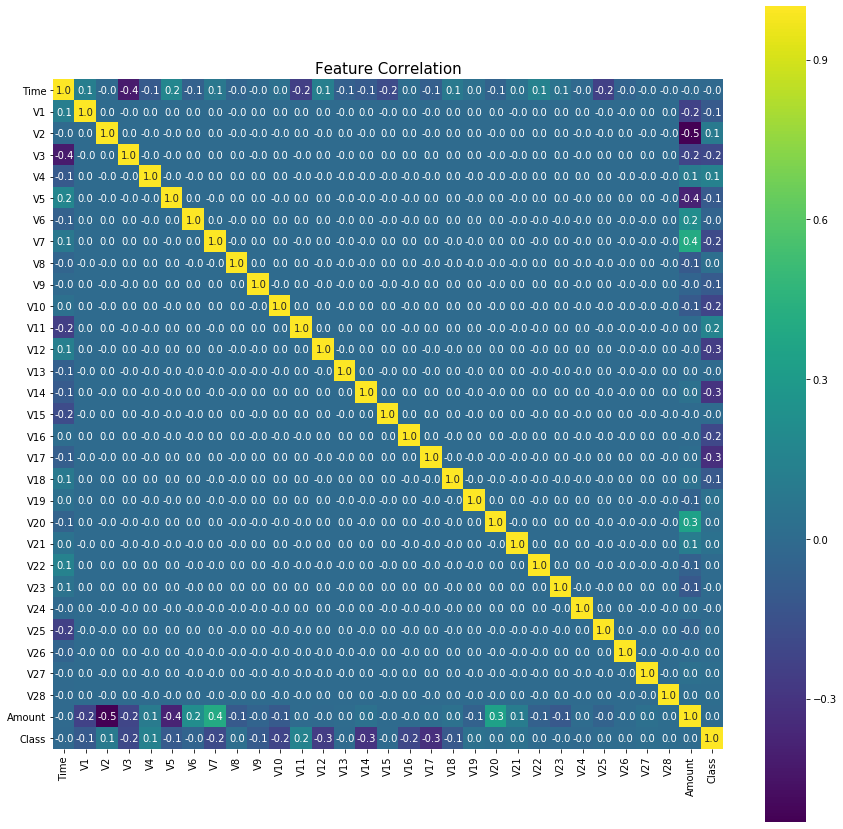

In [5]:
f = plt.figure(figsize=(15,15))

sns.heatmap(df.corr(), square=True, cmap="viridis", annot=True, fmt=".1f")

plt.title("Feature Correlation", fontsize=15)
plt.show()

The only features with correlation to the class label are: "V1", "V2", "V3",  "V4",  "V5",  "V7",  "V9", "V10",  "V11", "V12", "V14", "V16", "V17" and "V18".

In [6]:
corr_features = ["V1", "V2", "V3",  "V4",  "V5",  "V7",  "V9", "V10",  "V11", "V12", "V14", "V16", "V17", "V18"]

In [7]:
df.std()

Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
V12           0.999201
V13           0.995274
V14           0.958596
V15           0.915316
V16           0.876253
V17           0.849337
V18           0.838176
V19           0.814041
V20           0.770925
V21           0.734524
V22           0.725702
V23           0.624460
V24           0.605647
V25           0.521278
V26           0.482227
V27           0.403632
V28           0.330083
Amount      250.120109
Class         0.041527
dtype: float64

The V features where created using PCA for privacy reasons. This explaines why they are uncorrelated and sorted by variance.

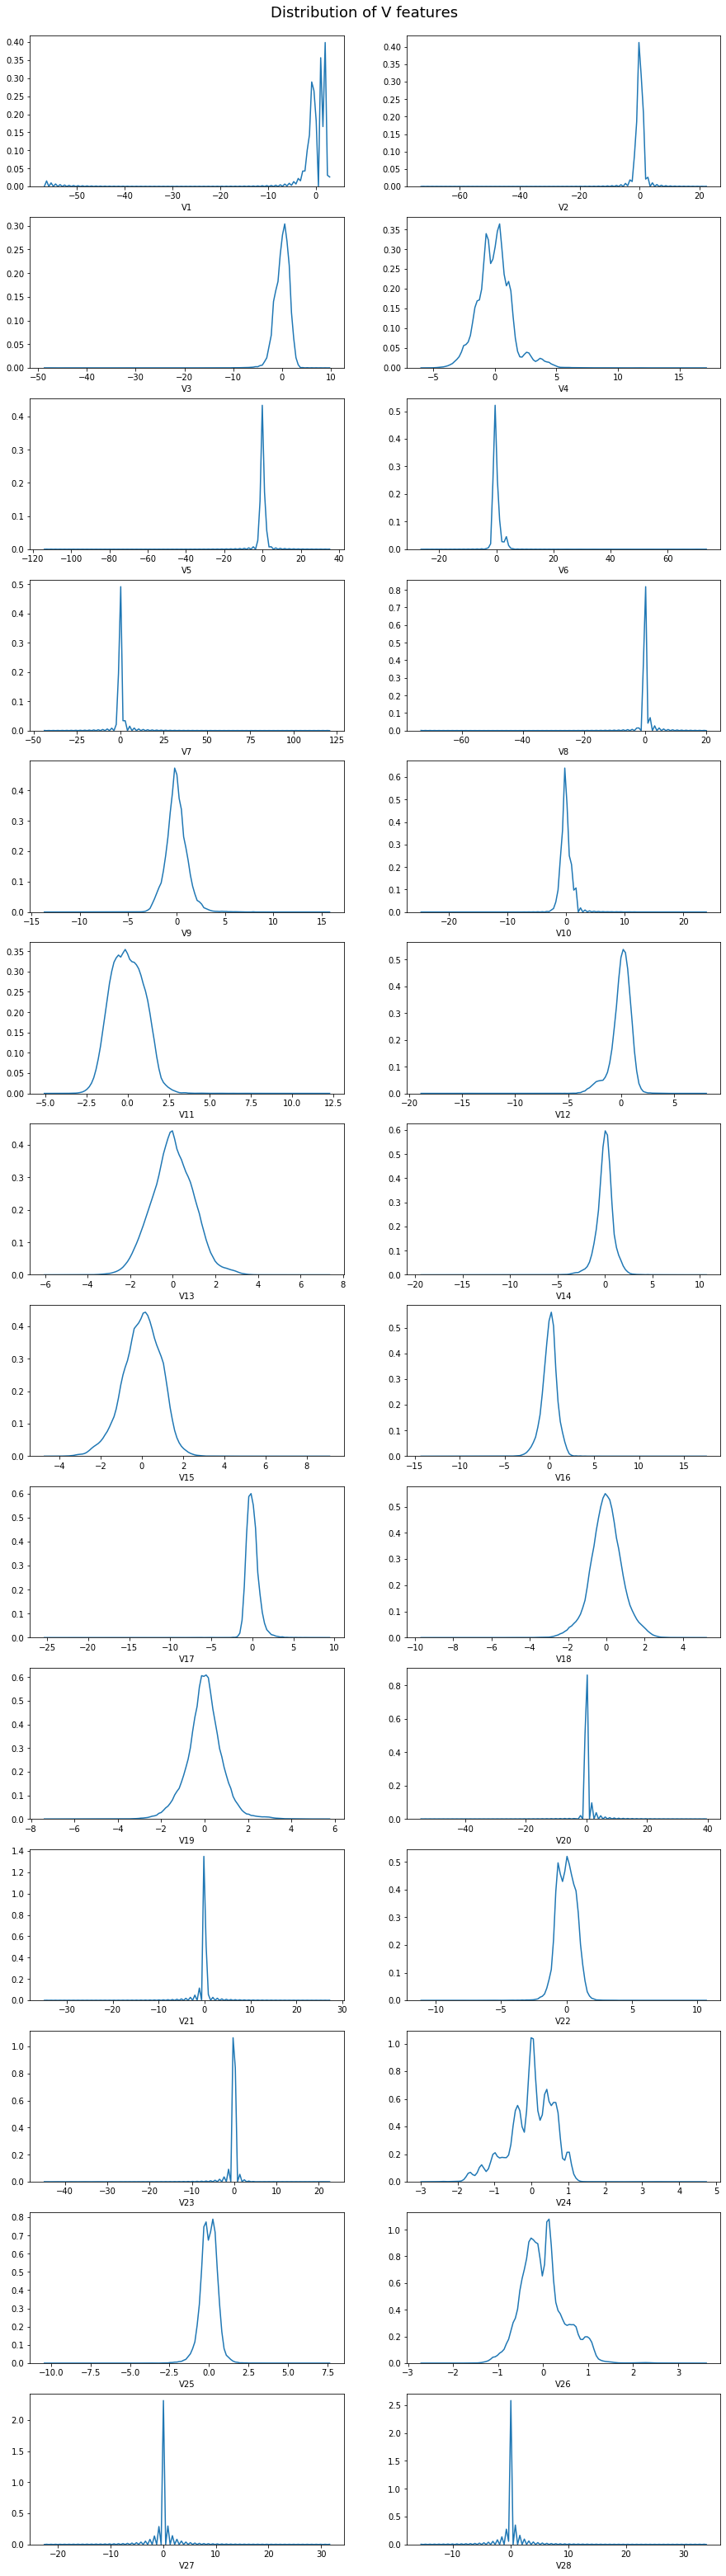

In [8]:
vfeats = list(df.columns)
vfeats.remove("Class")
vfeats.remove("Time")
vfeats.remove("Amount")

f, axs = plt.subplots(nrows=14, ncols=2, figsize=(15,50))
for ax,feat in zip(axs.reshape(-1),vfeats):
    sns.distplot(df[feat], hist=False, ax=ax)
    #ax.set_title(feat)
f.suptitle("Distribution of V features", fontsize=18)
plt.subplots_adjust(top=0.97)
plt.show()

The V features look fine and approximately normally distributed (at leas symmetrically)
 --> no data cleaning required
 
 However, there are outliers in especially in V1:V8.
 

We will use **boxplots** to further explore the relationship of the class label with the correlated features

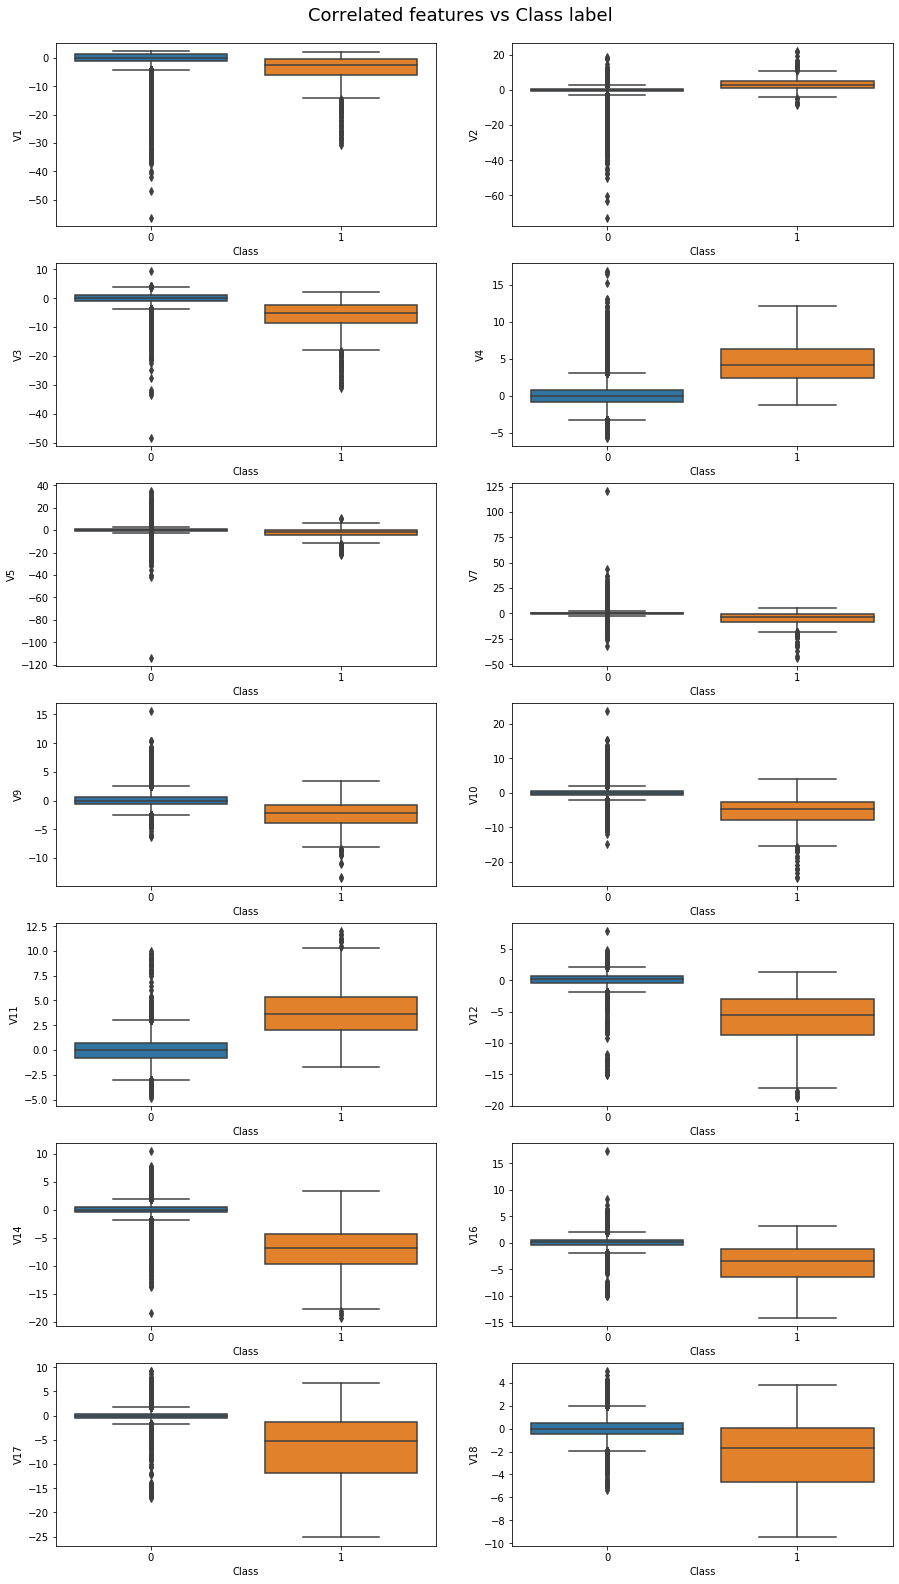

In [9]:
f, axs = plt.subplots(nrows=7, ncols=2, figsize=(15,25))
for ax,feat in zip(axs.reshape(-1),corr_features):
    sns.boxplot(x=df.Class, y=df[feat], ax=ax)
    #ax.set_title(feat)
f.suptitle("Correlated features vs Class label", fontsize=18)
plt.subplots_adjust(top=0.96)
plt.show()

The features look promising for classification, however they have a relatively high amount of outliers.

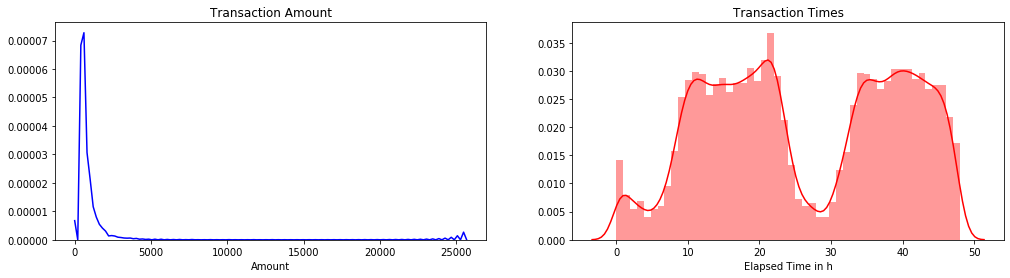

              Amount           Time
count  284807.000000  284807.000000
mean       88.349619   94813.859575
std       250.120109   47488.145955
min         0.000000       0.000000
25%         5.600000   54201.500000
50%        22.000000   84692.000000
75%        77.165000  139320.500000
max     25691.160000  172792.000000


In [10]:
f, ax = plt.subplots(1, 2, figsize=(17,4))
sns.distplot(df.Amount, hist=False, ax=ax[0], color="b")
ax[0].set_title('Transaction Amount')

sns.distplot((df.Time)/3600, ax=ax[1],hist=True, color="r")
ax[1].set_title("Transaction Times")
ax[1].set_xlabel("Elapsed Time in h")
plt.show()
print(df[["Amount", "Time"]].describe())

- Amounts look as expected with many smaller transactions and few larger ones.
- For both feautres data cleaning does not seem necessary 

It maybe interessting to convert the Time feature from elapsed seconds to time of day.

Looking at the density of the Time feature it seems plausible that the starting time of the data is around 0:00.<br>This assumption would explain the dips in transactions, which would be during early morning hours.

Let's see if time of day could be a useful feature.

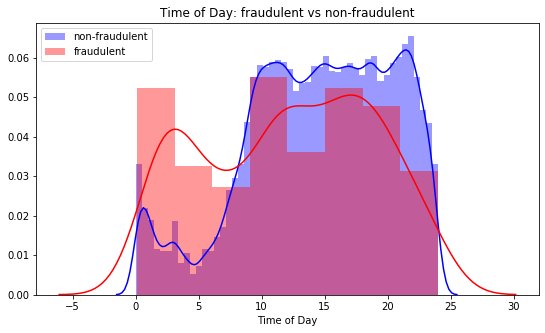

In [11]:
f, ax = plt.subplots(1,1,figsize=(9,5))
sns.distplot((df.Time[df.Class==0]/3600)%24, hist=True, ax=ax, color="b", label="non-fraudulent")
sns.distplot((df.Time[df.Class==1]/3600)%24, hist=True, ax=ax, color="r", label="fraudulent")
ax.set_title("Time of Day: fraudulent vs non-fraudulent")
ax.legend(loc="upper left")
ax.set_xlabel("Time of Day")
plt.show()


Fraudulent transactions seem to not dip as much in the morning hours as the non-fraudulent transactions.

Let's see wether the correlation with Class actually improves.

In [12]:
df["TimeClock"] = (df.Time/3600)%24
df["TimeFlag"] = np.array((df.TimeClock < 6), dtype=np.int8)

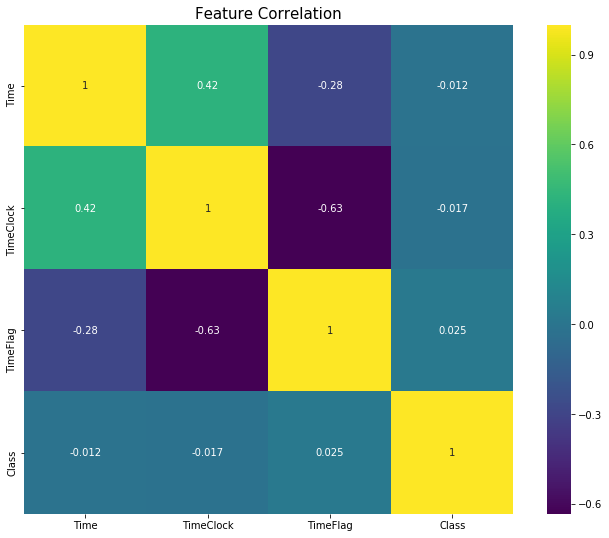

In [13]:
f = plt.figure(figsize=(12,9))

sns.heatmap(df[["Time", "TimeClock", "TimeFlag", "Class"]].corr(), square=True, annot=True, cmap="viridis")

plt.title("Feature Correlation", fontsize=15)
plt.show()

Tiny improvement in terms of correlation compared to elapsed time. <br>
Quite a bit of improvement for the flag indicating early morning transactions.